<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/preprocessingcasestudy_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/House_Pricing.csv')
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [6]:
df.isna()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dropna(subset=['Sale Price'],inplace=True)

In [10]:
null_rows = df[df['Latitude'].isna()]
null_rows

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
634,9550204515,14 September 2017,542000.0,2,1.0,890.0,3060.0,1.0,No,NaN,...,7,770.0,120,108,0,98105.0,NaN,-122.326,1760.0,4080


<Axes: >

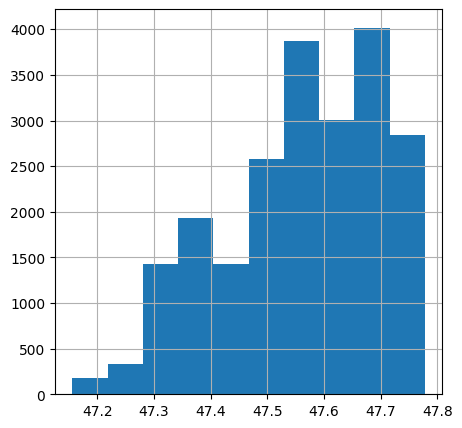

In [11]:
df['Latitude'].hist(figsize=(5,5))

In [12]:
df1 = df.select_dtypes(include=np.number).median()
df1

,0
ID,3.904931e+09
Sale Price,4.500000e+05
No of Bedrooms,3.000000e+00
No of Bathrooms,2.250000e+00
Flat Area (in Sqft),1.910000e+03
Lot Area (in Sqft),7.619000e+03
No of Floors,1.500000e+00
Overall Grade,7.000000e+00
Area of the House from Basement (in Sqft),1.560000e+03
Basement Area (in Sqft),0.000000e+00


In [13]:
df['Latitude'].fillna(df1['Latitude'], inplace=True)
df

/tmp/ipython-input-2584605496.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df1['Latitude'], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [14]:
df['Longitude'].fillna(df1['Longitude'], inplace=True)
df

/tmp/ipython-input-679676110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Longitude'].fillna(df1['Longitude'], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [15]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19485


In [16]:
null_rows = df[df['Flat Area (in Sqft)'].isna()]
null_rows

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
249,3797001895,15 April 2016,481000.0,3,1.75,NaN,3000.0,1.0,No,NaN,...,6,770.0,790,100,0,98103.0,47.6846,-122.345,1390.0,3000
275,4215100060,15 March 2016,365000.0,3,2.50,NaN,4510.0,2.0,No,NaN,...,8,2653.0,0,12,0,98031.0,47.4145,-122.166,2653.0,4927
296,5468730030,14 August 2017,265000.0,3,2.00,NaN,8959.0,1.0,No,NaN,...,7,1320.0,0,25,0,98042.0,47.3536,-122.144,1740.0,7316
372,2231500030,15 March 2016,530000.0,4,2.25,NaN,10754.0,1.0,No,NaN,...,7,1100.0,1080,64,0,98133.0,47.7711,-122.341,1810.0,6929
16064,7954300460,14 September 2017,568500.0,4,2.50,NaN,6181.0,2.0,No,NaN,...,9,3010.0,0,18,0,98056.0,47.5212,-122.192,2960.0,6515
18152,7574910450,15 February 2016,845000.0,4,2.50,NaN,40471.0,2.0,No,NaN,...,10,3360.0,0,24,0,98077.0,47.7420,-122.035,3150.0,36823
20385,2781240040,14 August 2017,342000.0,3,2.00,NaN,4802.0,1.0,No,NaN,...,8,1640.0,0,8,0,98038.0,47.3538,-122.021,1940.0,4802
20965,3679400484,14 September 2017,295500.0,3,2.50,NaN,1332.0,2.0,No,NaN,...,7,960.0,450,4,0,98108.0,47.5683,-122.314,1410.0,1343
21335,5100400244,15 April 2016,403000.0,2,1.00,NaN,1552.0,2.0,No,NaN,...,7,894.0,0,7,0,98115.0,47.6911,-122.313,1131.0,1992


In [17]:
df['Flat Area (in Sqft)'].fillna(df1['Flat Area (in Sqft)'], inplace=True)
df

/tmp/ipython-input-3164397284.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flat Area (in Sqft)'].fillna(df1['Flat Area (in Sqft)'], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [18]:
df['Lot Area (in Sqft)'].fillna(df1['Lot Area (in Sqft)'], inplace=True)
df

/tmp/ipython-input-2296771136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Area (in Sqft)'].fillna(df1['Lot Area (in Sqft)'], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [19]:
df['No of Bathrooms'].fillna(df1['No of Bathrooms'], inplace=True)
df

/tmp/ipython-input-412563670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['No of Bathrooms'].fillna(df1['No of Bathrooms'], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [20]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,19485


In [21]:
df2 = df.mode()
# df2
df['Zipcode'].mode()[0]

np.float64(98103.0)

In [22]:
df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)
df

/tmp/ipython-input-2279503346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [23]:
df['Area of the House from Basement (in Sqft)'].fillna(df1['Area of the House from Basement (in Sqft)'],
                                                       inplace=True)
df

/tmp/ipython-input-2405153493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area of the House from Basement (in Sqft)'].fillna(df1['Area of the House from Basement (in Sqft)'],


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [24]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,19485


In [25]:
df['Living Area after Renovation (in Sqft)'].fillna(df1['Living Area after Renovation (in Sqft)'],
                                                       inplace=True)
df

/tmp/ipython-input-3891765824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Living Area after Renovation (in Sqft)'].fillna(df1['Living Area after Renovation (in Sqft)'],


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [26]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,19485


In [27]:
df3=df.select_dtypes(include=np.number).corr()
df3

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
ID,1.000000,-0.016834,0.001450,0.005233,-0.012379,-0.132153,0.018653,0.013762,-0.010724,-0.005189,-0.021524,-0.016936,-0.008235,-0.001983,0.020720,-0.002913,-0.138843
Sale Price,-0.016834,1.000000,0.308463,0.525090,0.702056,0.089559,0.256941,0.580654,0.605366,0.323813,-0.054034,0.126436,-0.053191,0.306889,0.021508,0.585394,0.082445
No of Bedrooms,0.001450,0.308463,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,0.018861,-0.152760,-0.008708,0.129569,0.391771,0.029264
No of Bathrooms,0.005233,0.525090,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.050761,-0.203951,0.024570,0.223171,0.568568,0.087226
Flat Area (in Sqft),-0.012379,0.702056,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.055380,-0.199380,0.052538,0.240091,0.756185,0.183223
Lot Area (in Sqft),-0.132153,0.089559,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,0.007634,-0.129551,-0.085719,0.229449,0.144507,0.718527
No of Floors,0.018653,0.256941,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.006376,-0.059222,0.049692,0.125620,0.280106,-0.011204
Overall Grade,0.013762,0.580654,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.010436,-0.185844,0.111226,0.201736,0.681362,0.107581
Area of the House from Basement (in Sqft),-0.010724,0.605366,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,0.023308,-0.261124,-0.000819,0.343793,0.731996,0.194106
Basement Area (in Sqft),-0.005189,0.323813,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.071328,0.074933,0.110451,-0.144822,0.200302,0.017263


In [28]:
if "Sale Price" in df.columns:
    print(df3["Sale Price"].sort_values(ascending=False))

Sale Price                                   1.000000
Flat Area (in Sqft)                          0.702056
Area of the House from Basement (in Sqft)    0.605366
Living Area after Renovation (in Sqft)       0.585394
Overall Grade                                0.580654
No of Bathrooms                              0.525090
Basement Area (in Sqft)                      0.323813
No of Bedrooms                               0.308463
Latitude                                     0.306889
No of Floors                                 0.256941
Renovated Year                               0.126436
Lot Area (in Sqft)                           0.089559
Lot Area after Renovation (in Sqft)          0.082445
Longitude                                    0.021508
ID                                          -0.016834
Zipcode                                     -0.053191
Age of House (in Years)                     -0.054034
Name: Sale Price, dtype: float64


In [29]:
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [30]:
import matplotlib.pyplot as plt

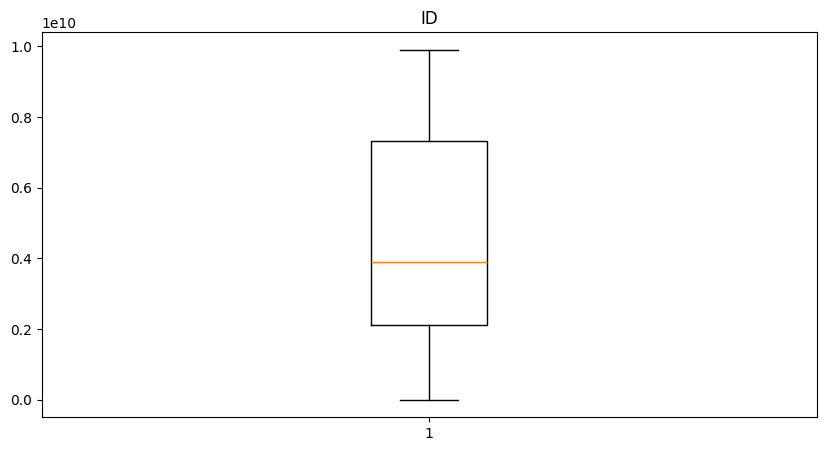

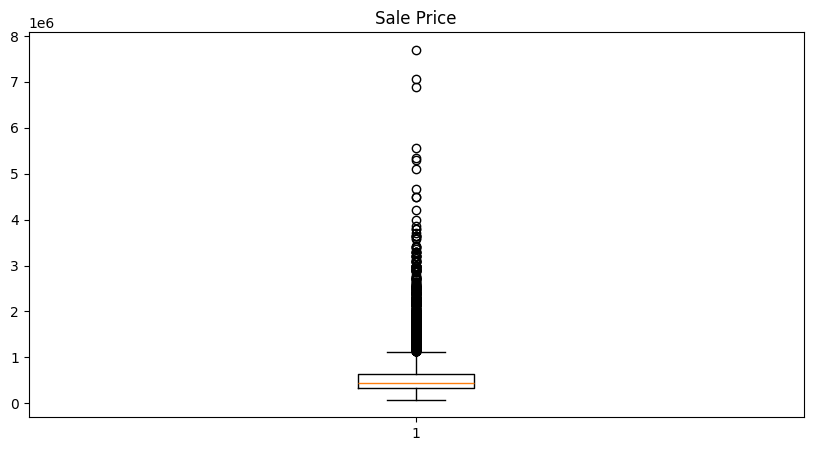

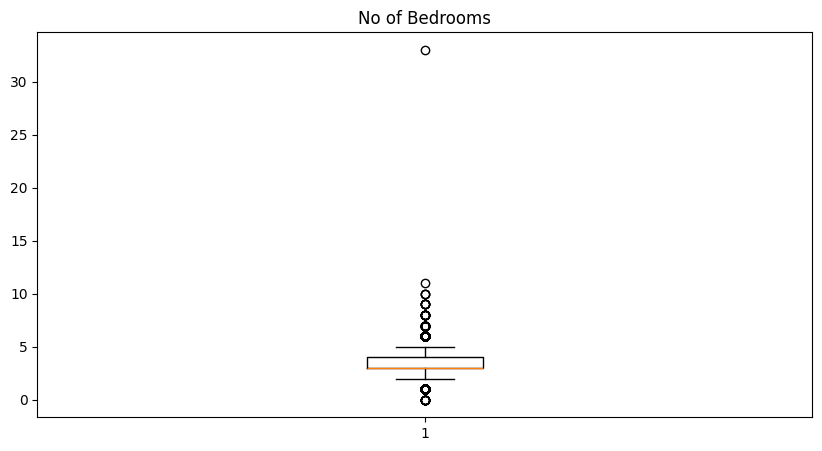

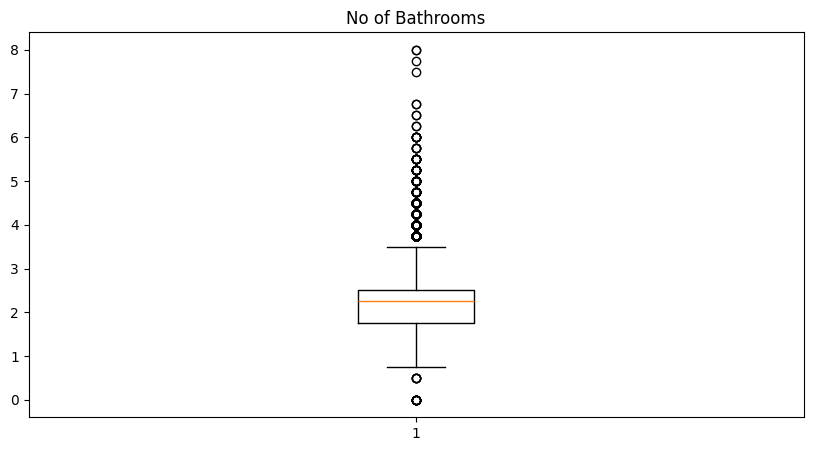

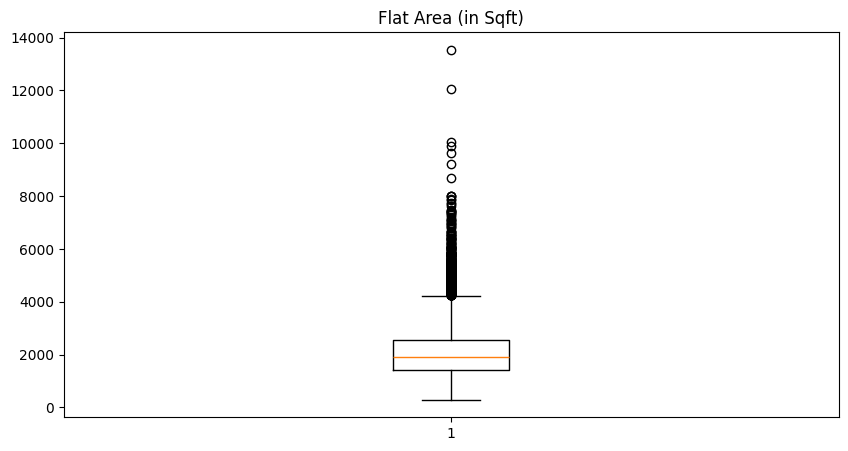

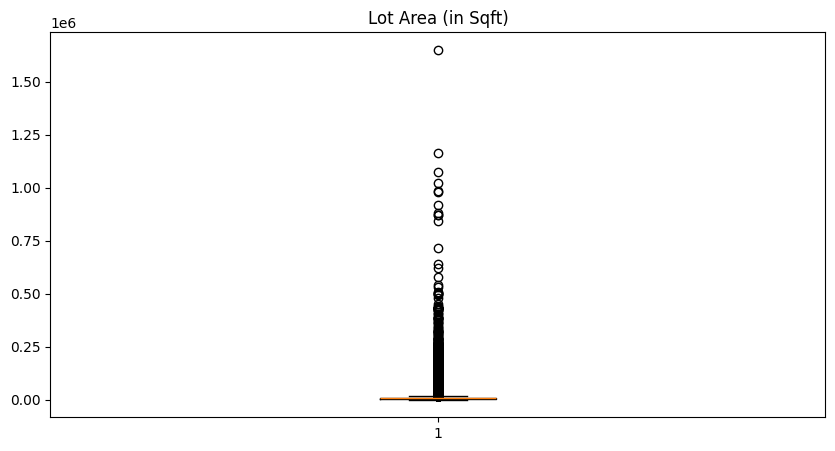

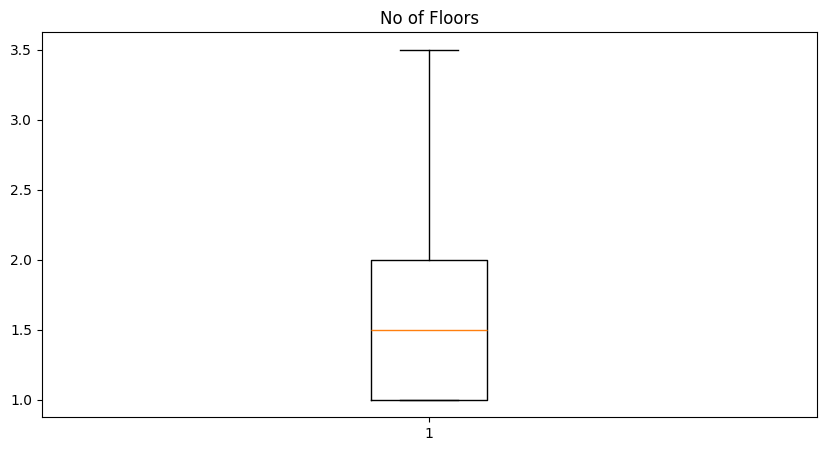

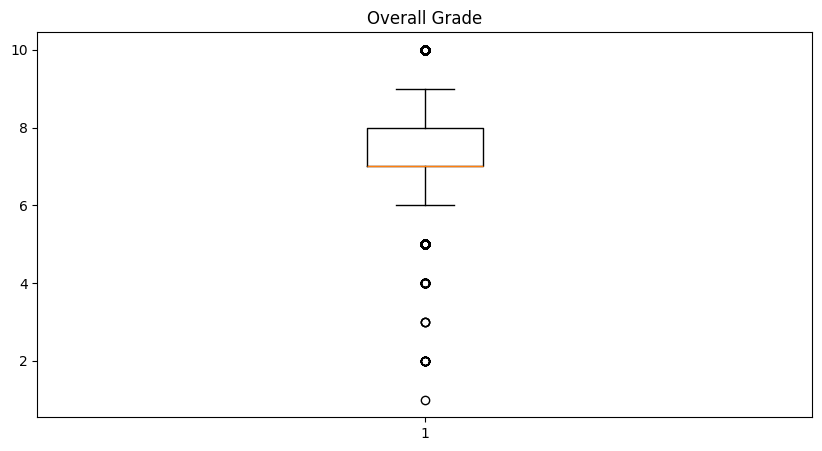

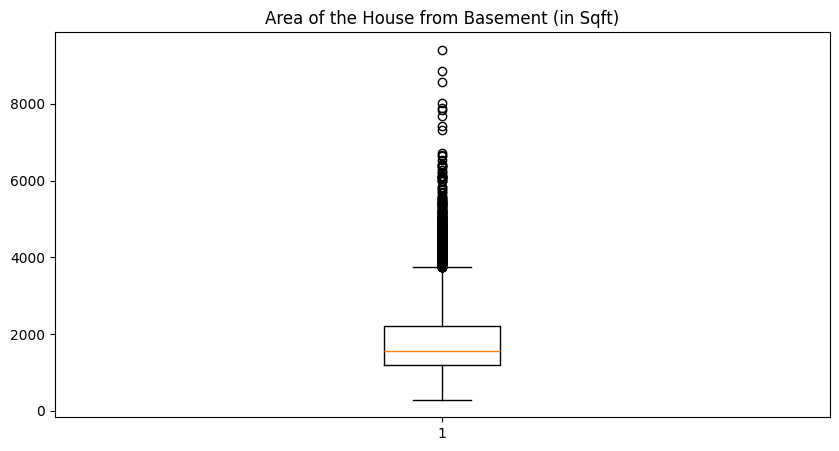

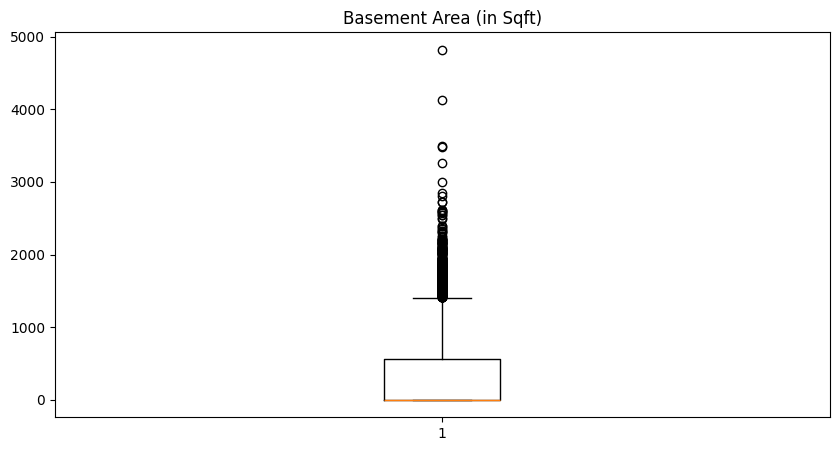

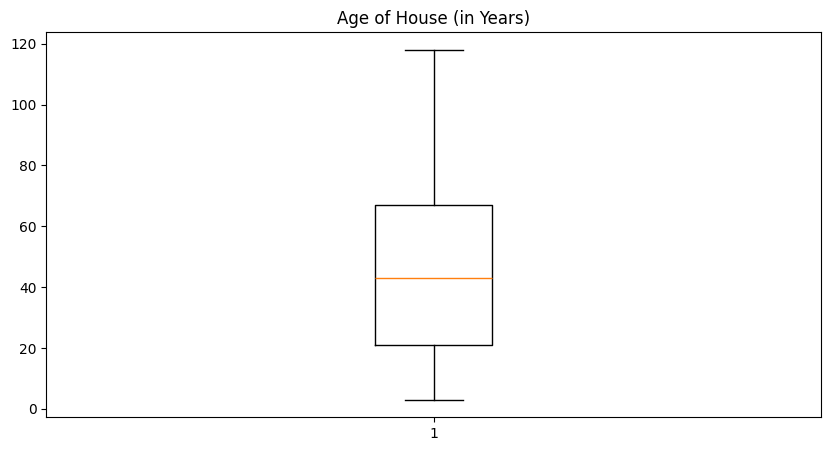

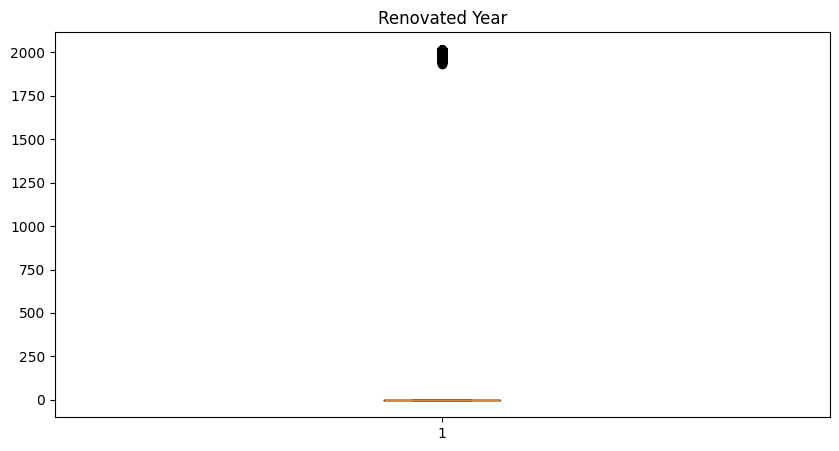

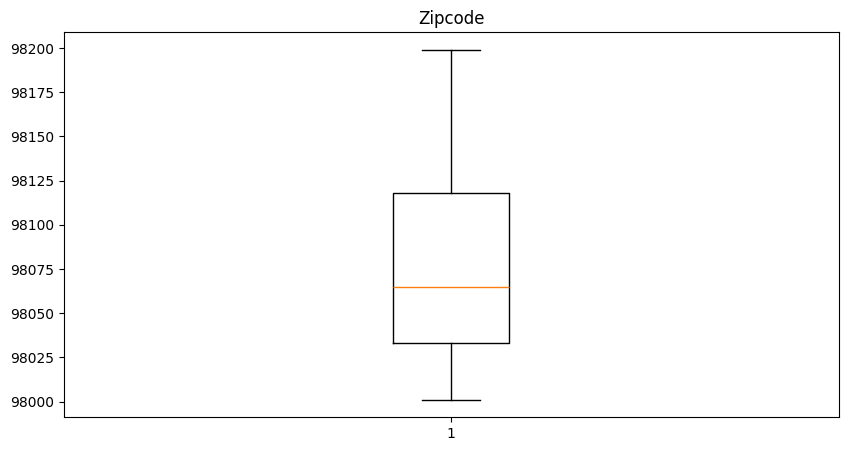

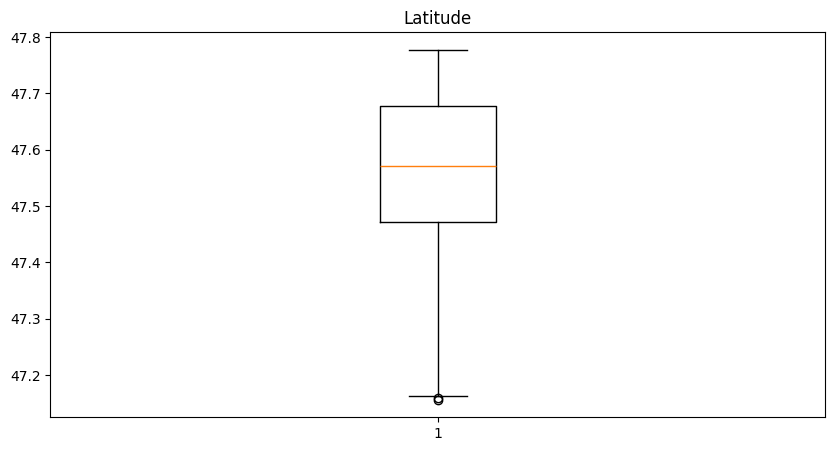

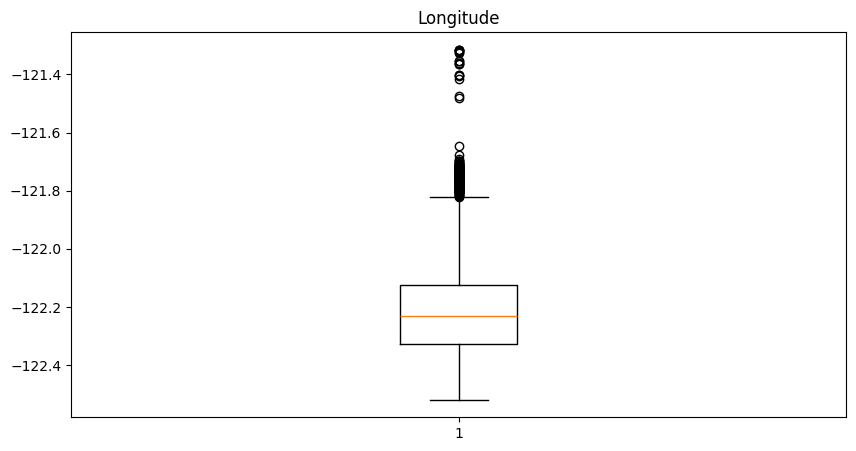

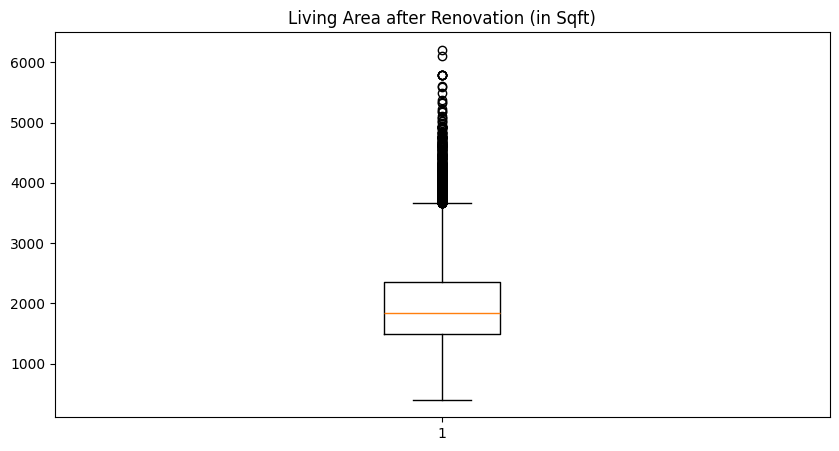

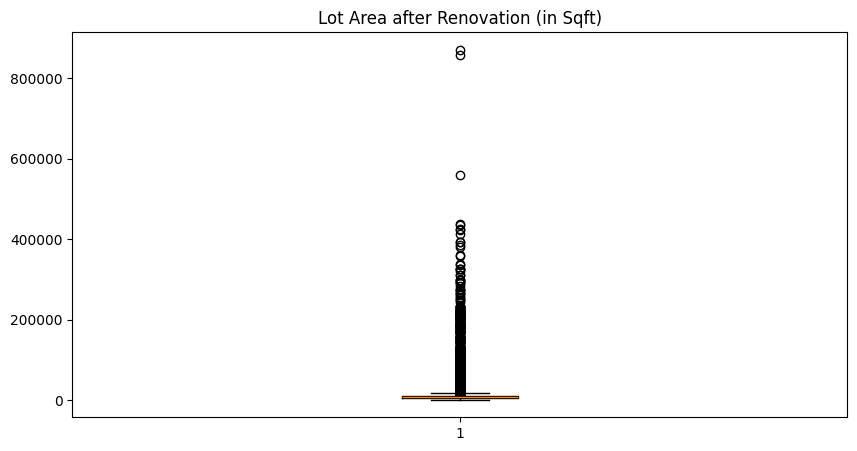

In [31]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(df[i])
  plt.title(i)

In [32]:
Q1 = np.quantile(df['No of Bedrooms'],0.25)
Q3 = np.quantile(df['No of Bedrooms'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 3.0
Q3 4.0
IQR 1.0
upper bound 5.5
lower bound 1.5


In [33]:
No_of_Bedrooms_outliers = []
for i in df['No of Bedrooms']:
  if i > upperbound or i < lowerbound:
    No_of_Bedrooms_outliers.append(i)
No_of_Bedrooms_outliers

[1,
 6,
 6,
 6,
 1,
 6,
 1,
 1,
 6,
 6,
 7,
 6,
 1,
 6,
 6,
 6,
 6,
 1,
 0,
 1,
 1,
 7,
 1,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 1,
 1,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 8,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 6,
 1,
 0,
 6,
 1,
 6,
 1,
 1,
 1,
 6,
 1,
 0,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 1,
 6,
 7,
 6,
 6,
 6,
 1,
 1,
 1,
 6,
 6,
 1,
 1,
 7,
 8,
 8,
 1,
 9,
 6,
 1,
 6,
 9,
 6,
 6,
 6,
 1,
 1,
 1,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 7,
 7,
 1,
 7,
 0,
 1,
 6,
 1,
 6,
 6,
 6,
 1,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 9,
 1,
 1,
 1,
 6,
 8,
 6,
 6,
 6,
 6,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 0,
 1,
 7,
 6,
 6,
 6,
 7,
 6,
 1,
 6,
 6,
 1,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 6,
 7,
 1,
 6,
 1,
 6,
 1,
 6,
 1,
 6,
 6,
 6,
 1,
 0,
 0,
 7,
 1,
 1,
 9,
 1,
 1,
 1,
 7,
 6,
 6,
 1,
 11,
 1,
 1,
 6,
 1,
 6,
 1,
 6,
 8,
 6,

In [34]:
df['No of Bedrooms'] = df['No of Bedrooms'].clip(lower = lowerbound,upper = upperbound)
df['No of Bedrooms']

,No of Bedrooms
0,3.0
1,3.0
2,2.0
3,4.0
4,3.0
...,...
21608,3.0
21609,4.0
21610,2.0
21611,3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b321f37a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b321f1130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b321b9790>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b3225eb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b3221c3b0>],
 'means': []}

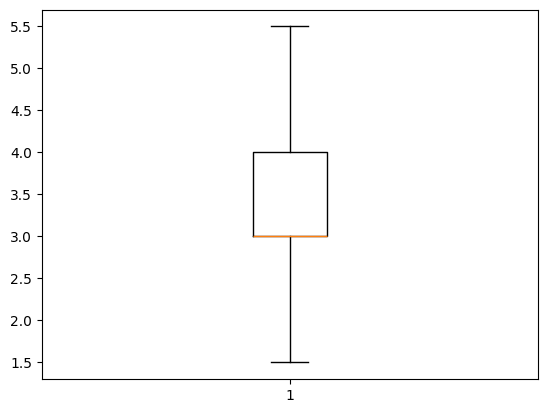

In [35]:
plt.boxplot(df['No of Bedrooms'])

In [36]:
Q1 = np.quantile(df['No of Bathrooms'],0.25)
Q3 = np.quantile(df['No of Bathrooms'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 1.75
Q3 2.5
IQR 0.75
upper bound 3.625
lower bound 0.625


In [37]:
No_of_Bathrooms_outliers = []
for i in df['No of Bathrooms']:
  if i > upperbound or i < lowerbound:
    No_of_Bathrooms_outliers.append(i)
No_of_Bathrooms_outliers

[4.5,
 4.0,
 4.0,
 4.75,
 5.0,
 4.25,
 4.5,
 4.25,
 3.75,
 5.0,
 4.0,
 4.0,
 4.25,
 4.25,
 0.0,
 4.25,
 4.5,
 4.5,
 3.75,
 4.5,
 4.0,
 0.0,
 4.5,
 5.25,
 4.0,
 3.75,
 4.5,
 4.5,
 4.25,
 6.0,
 3.75,
 4.25,
 4.0,
 3.75,
 3.75,
 4.75,
 5.0,
 3.75,
 3.75,
 3.75,
 5.0,
 4.25,
 3.75,
 4.0,
 4.25,
 4.5,
 3.75,
 4.0,
 3.75,
 5.0,
 3.75,
 4.0,
 3.75,
 3.75,
 4.25,
 4.0,
 4.25,
 4.25,
 4.5,
 3.75,
 4.0,
 3.75,
 5.0,
 3.75,
 0.5,
 4.0,
 5.0,
 5.0,
 4.5,
 5.5,
 4.25,
 4.0,
 4.5,
 3.75,
 3.75,
 4.5,
 3.75,
 5.5,
 4.25,
 5.5,
 0.0,
 5.25,
 4.25,
 4.0,
 4.5,
 3.75,
 3.75,
 3.75,
 3.75,
 4.25,
 4.5,
 4.75,
 3.75,
 3.75,
 3.75,
 3.75,
 3.75,
 4.5,
 4.25,
 4.0,
 4.75,
 4.75,
 3.75,
 4.5,
 4.0,
 3.75,
 3.75,
 4.0,
 4.0,
 3.75,
 4.75,
 4.5,
 3.75,
 6.75,
 6.0,
 4.5,
 5.5,
 4.5,
 3.75,
 4.0,
 4.25,
 3.75,
 5.75,
 3.75,
 4.0,
 4.0,
 4.0,
 5.25,
 4.75,
 4.0,
 4.25,
 3.75,
 4.0,
 4.0,
 5.25,
 3.75,
 3.75,
 3.75,
 4.5,
 5.0,
 3.75,
 3.75,
 4.5,
 4.0,
 3.75,
 3.75,
 4.0,
 4.75,
 3.75,
 0.0,
 4.25,
 5.0,
 3.75,


In [38]:
df['No of Bathrooms'] = df['No of Bathrooms'].clip(lower = lowerbound,upper = upperbound)
df['No of Bathrooms']

,No of Bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00
...,...
21608,2.50
21609,2.50
21610,0.75
21611,2.50


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b320b5a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b320b5e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b320b5760>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b320b63c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b320b6690>],
 'means': []}

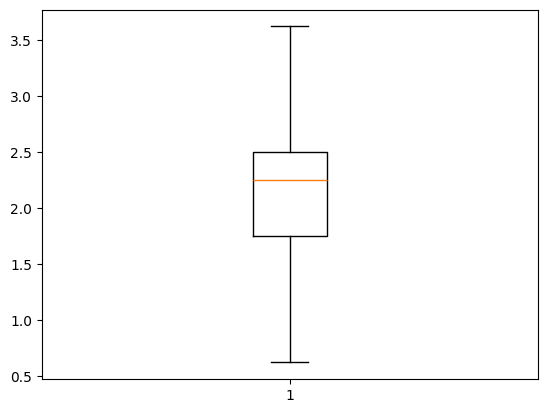

In [39]:
plt.boxplot(df['No of Bathrooms'])

In [40]:
Q1 = np.quantile(df['Flat Area (in Sqft)'],0.25)
Q3 = np.quantile(df['Flat Area (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 1430.0
Q3 2550.0
IQR 1120.0
upper bound 4230.0
lower bound -250.0


In [41]:
flatarea_outliers = []
for i in df['Flat Area (in Sqft)']:
  if i > upperbound or i < lowerbound:
    flatarea_outliers.append(i)
flatarea_outliers

[5420.0,
 4770.0,
 4380.0,
 5180.0,
 4410.0,
 5050.0,
 5310.0,
 4550.0,
 4290.0,
 4290.0,
 4800.0,
 6070.0,
 4870.0,
 4860.0,
 4860.0,
 4410.0,
 4760.0,
 6050.0,
 4740.0,
 5403.0,
 4380.0,
 4640.0,
 6050.0,
 4370.0,
 4570.0,
 4670.0,
 4860.0,
 4270.0,
 4890.0,
 4390.0,
 4250.0,
 5670.0,
 4475.0,
 6070.0,
 4300.0,
 4390.0,
 8010.0,
 4460.0,
 4610.0,
 4380.0,
 4250.0,
 4930.0,
 7390.0,
 4640.0,
 5320.0,
 8000.0,
 6563.0,
 4740.0,
 5450.0,
 4440.0,
 4830.0,
 4280.0,
 4570.0,
 4370.0,
 5710.0,
 5620.0,
 5774.0,
 4470.0,
 4490.0,
 5040.0,
 5770.0,
 5180.0,
 6400.0,
 4490.0,
 6055.0,
 4250.0,
 6300.0,
 4350.0,
 4460.0,
 4340.0,
 4250.0,
 5110.0,
 4700.0,
 4910.0,
 4750.0,
 6840.0,
 4930.0,
 5180.0,
 5130.0,
 6640.0,
 5740.0,
 7350.0,
 4510.0,
 4300.0,
 4870.0,
 5020.0,
 4740.0,
 5370.0,
 4860.0,
 6930.0,
 6550.0,
 6110.0,
 4883.0,
 5010.0,
 4660.0,
 4600.0,
 4910.0,
 5410.0,
 4270.0,
 4520.0,
 5340.0,
 5230.0,
 5370.0,
 4730.0,
 4430.0,
 5780.0,
 6240.0,
 10040.0,
 4250.0,
 5360.0,
 4610.0,


In [42]:
df['Flat Area (in Sqft)'] = df['Flat Area (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Flat Area (in Sqft)']

,Flat Area (in Sqft)
0,1180.0
1,2570.0
2,770.0
3,1960.0
4,1680.0
...,...
21608,1530.0
21609,2310.0
21610,1020.0
21611,1600.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31f581d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31f586b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b320f7ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31f58c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31f58ec0>],
 'means': []}

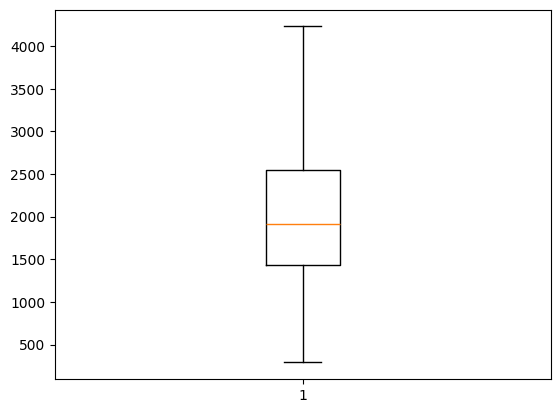

In [43]:
plt.boxplot(df['Flat Area (in Sqft)'])

In [44]:
Q1 = np.quantile(df['Lot Area (in Sqft)'],0.25)
Q3 = np.quantile(df['Lot Area (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 5040.0
Q3 10687.0
IQR 5647.0
upper bound 19157.5
lower bound -3430.5


In [45]:
lotarea_outliers = []
for i in df['Lot Area (in Sqft)']:
  if i > upperbound or i < lowerbound:
    lotarea_outliers.append(i)
lotarea_outliers

[101930.0,
 19901.0,
 44867.0,
 34848.0,
 24186.0,
 65005.0,
 21235.0,
 20158.0,
 50094.0,
 50529.0,
 35102.0,
 39683.0,
 41800.0,
 36847.0,
 107593.0,
 33919.0,
 28037.0,
 111078.0,
 315374.0,
 60984.0,
 19850.0,
 25245.0,
 38332.0,
 21000.0,
 35003.0,
 66211.0,
 155073.0,
 33474.0,
 19436.0,
 28040.0,
 94300.0,
 221284.0,
 36224.0,
 40510.0,
 20100.0,
 57346.0,
 26300.0,
 49375.0,
 22111.0,
 78408.0,
 64904.0,
 45004.0,
 43995.0,
 20000.0,
 32633.0,
 19800.0,
 77972.0,
 29970.0,
 40438.0,
 69415.0,
 209959.0,
 26977.0,
 25600.0,
 22357.0,
 40139.0,
 143947.0,
 32239.0,
 37461.0,
 174240.0,
 171626.0,
 27260.0,
 19700.0,
 219978.0,
 24920.0,
 20978.0,
 28025.0,
 181319.0,
 19635.0,
 57063.0,
 39150.0,
 194278.0,
 230652.0,
 36947.0,
 76230.0,
 24069.0,
 40518.0,
 29242.0,
 29170.0,
 108900.0,
 217014.0,
 22370.0,
 75794.0,
 84942.0,
 217800.0,
 32666.0,
 31465.0,
 34293.0,
 26326.0,
 36400.0,
 55867.0,
 22267.0,
 209523.0,
 19252.0,
 23488.0,
 25958.0,
 26055.0,
 39478.0,
 51836.0,
 3

In [46]:
df['Lot Area (in Sqft)'] = df['Lot Area (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Lot Area (in Sqft)']

,Lot Area (in Sqft)
0,5650.0
1,7242.0
2,10000.0
3,5000.0
4,8080.0
...,...
21608,1131.0
21609,5813.0
21610,1350.0
21611,2388.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31fc0470>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31fc0a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31fc01a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31fc0fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31fc11c0>],
 'means': []}

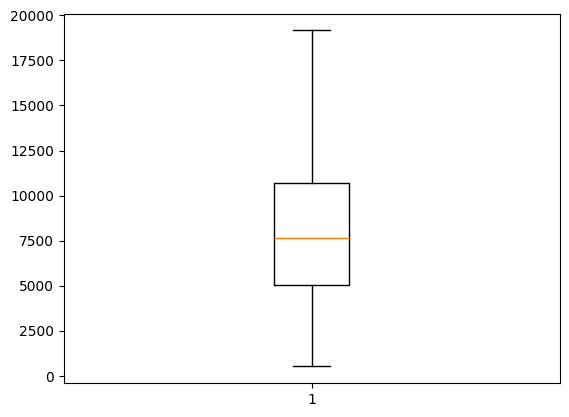

In [47]:
plt.boxplot(df['Lot Area (in Sqft)'])

In [48]:
Q1 = np.quantile(df['Overall Grade'],0.25)
Q3 = np.quantile(df['Overall Grade'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 7.0
Q3 8.0
IQR 1.0
upper bound 9.5
lower bound 5.5


In [49]:
overall_outliers = []
for i in df['Overall Grade']:
  if i > upperbound or i < lowerbound:
    overall_outliers.append(i)
overall_outliers

[10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 5,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 10,
 5,
 10,
 10,
 10,
 5,
 10,
 5,
 10,
 3,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10

In [50]:
df['Overall Grade'] = df['Overall Grade'].clip(lower = lowerbound,upper = upperbound)
df['Overall Grade']

,Overall Grade
0,7.0
1,7.0
2,6.0
3,7.0
4,8.0
...,...
21608,8.0
21609,8.0
21610,7.0
21611,8.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31e28860>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31e28dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31e28560>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31e29280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31e294c0>],
 'means': []}

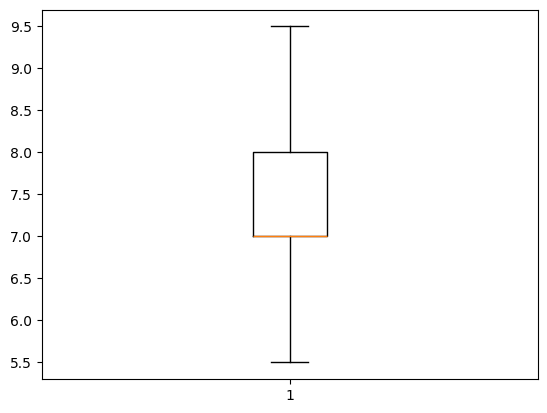

In [51]:
plt.boxplot(df['Overall Grade'])

In [52]:
Q1 = np.quantile(df['Area of the House from Basement (in Sqft)'],0.25)
Q3 = np.quantile(df['Area of the House from Basement (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 1190.0
Q3 2210.0
IQR 1020.0
upper bound 3740.0
lower bound -340.0


In [53]:
area_basement_outliers = []
for i in df['Area of the House from Basement (in Sqft)']:
  if i > upperbound or i < lowerbound:
    area_basement_outliers.append(i)
area_basement_outliers

[3890.0,
 3760.0,
 4750.0,
 5310.0,
 3840.0,
 6070.0,
 4040.0,
 3840.0,
 4860.0,
 3860.0,
 4410.0,
 6050.0,
 4740.0,
 5403.0,
 4120.0,
 4150.0,
 4370.0,
 4570.0,
 4670.0,
 4230.0,
 4270.0,
 5670.0,
 4475.0,
 6070.0,
 4300.0,
 3990.0,
 5990.0,
 4460.0,
 4190.0,
 4250.0,
 4930.0,
 3840.0,
 5000.0,
 5320.0,
 6720.0,
 4210.0,
 3890.0,
 3830.0,
 5153.0,
 4210.0,
 4740.0,
 5450.0,
 4280.0,
 3880.0,
 4570.0,
 3750.0,
 4130.0,
 5710.0,
 4700.0,
 3810.0,
 4490.0,
 4150.0,
 4070.0,
 3840.0,
 5770.0,
 4030.0,
 3810.0,
 4490.0,
 3840.0,
 4360.0,
 3960.0,
 4460.0,
 4340.0,
 3850.0,
 4750.0,
 4350.0,
 4160.0,
 5180.0,
 4070.0,
 5130.0,
 6350.0,
 3770.0,
 3780.0,
 4750.0,
 3950.0,
 3915.0,
 3880.0,
 4870.0,
 4030.0,
 4740.0,
 3850.0,
 4860.0,
 4310.0,
 3930.0,
 4070.0,
 4080.0,
 5400.0,
 6110.0,
 3859.0,
 4600.0,
 3940.0,
 3800.0,
 4230.0,
 4070.0,
 5050.0,
 4000.0,
 4220.0,
 3860.0,
 3890.0,
 3890.0,
 5230.0,
 5370.0,
 4140.0,
 4270.0,
 4430.0,
 4210.0,
 4130.0,
 3780.0,
 4610.0,
 7680.0,
 4250.0,
 

In [54]:
df['Area of the House from Basement (in Sqft)'] = df['Area of the House from Basement (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Area of the House from Basement (in Sqft)']

,Area of the House from Basement (in Sqft)
0,1180.0
1,2170.0
2,770.0
3,1050.0
4,1680.0
...,...
21608,1530.0
21609,2310.0
21610,1020.0
21611,1600.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31e98530>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31e99a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31e99490>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31e99fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31e9a2d0>],
 'means': []}

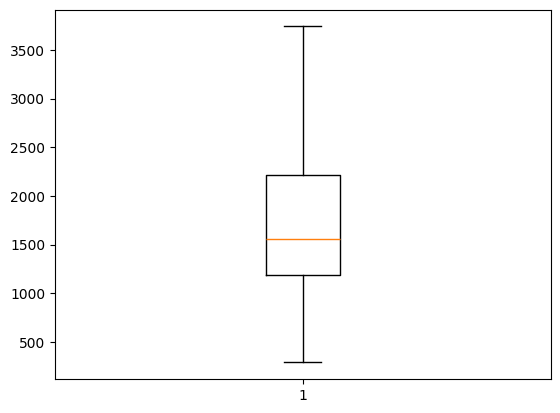

In [55]:
plt.boxplot(df['Area of the House from Basement (in Sqft)'])

In [56]:
Q1 = np.quantile(df['Basement Area (in Sqft)'],0.25)
Q3 = np.quantile(df['Basement Area (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 0.0
Q3 560.0
IQR 560.0
upper bound 1400.0
lower bound -840.0


In [57]:
basement_area_outliers = []
for i in df['Basement Area (in Sqft)']:
  if i > upperbound or i < lowerbound:
    basement_area_outliers.append(i)
basement_area_outliers

[1530,
 1700,
 1620,
 1510,
 1600,
 1700,
 1600,
 1490,
 1640,
 1460,
 2000,
 1430,
 1950,
 2060,
 1820,
 1450,
 1950,
 1600,
 1600,
 1580,
 1470,
 1780,
 1900,
 1450,
 1760,
 1600,
 1720,
 1760,
 1510,
 1800,
 1810,
 1460,
 1830,
 1590,
 1620,
 1420,
 1960,
 1560,
 2020,
 2110,
 1490,
 2390,
 1600,
 1780,
 2020,
 1700,
 1410,
 1450,
 1500,
 1800,
 1580,
 1800,
 1480,
 1670,
 1510,
 1800,
 1620,
 2570,
 2110,
 1490,
 2590,
 1580,
 1480,
 1410,
 1480,
 2500,
 1940,
 1550,
 2350,
 2490,
 1481,
 1470,
 1520,
 1850,
 1830,
 1660,
 2130,
 2600,
 1450,
 1850,
 1690,
 1850,
 1600,
 1520,
 1780,
 2620,
 1600,
 1430,
 1798,
 2060,
 1610,
 1780,
 1440,
 1590,
 1500,
 1450,
 1600,
 1690,
 1500,
 1470,
 1570,
 1590,
 1650,
 1500,
 1510,
 1910,
 1630,
 2360,
 1852,
 2090,
 2400,
 1480,
 1790,
 2150,
 1500,
 1440,
 1500,
 1430,
 1720,
 1500,
 1410,
 1680,
 2100,
 3000,
 1870,
 1530,
 1420,
 1460,
 1710,
 1640,
 1500,
 1410,
 2030,
 1650,
 1820,
 1540,
 1540,
 1710,
 1460,
 2850,
 1610,
 1800,
 1660,

In [58]:
df['Basement Area (in Sqft)'] = df['Basement Area (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Basement Area (in Sqft)']

,Basement Area (in Sqft)
0,0
1,400
2,0
3,910
4,0
...,...
21608,0
21609,0
21610,0
21611,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31f00980>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31f00f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31f00680>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31f01490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31f01760>],
 'means': []}

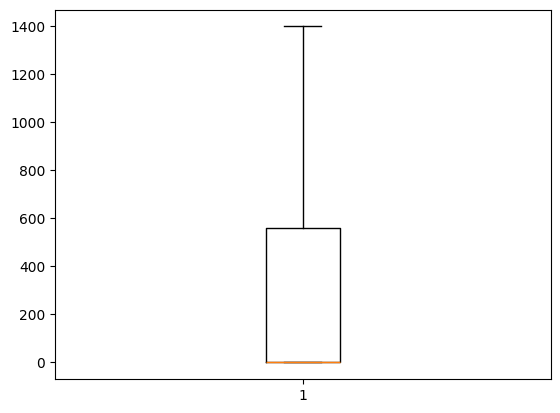

In [59]:
plt.boxplot(df['Basement Area (in Sqft)'])

In [60]:
Q1 = np.quantile(df['Longitude'],0.25)
Q3 = np.quantile(df['Longitude'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 -122.328
Q3 -122.125
IQR 0.20300000000000296
upper bound -121.8205
lower bound -122.63250000000001


In [61]:
longitude_outliers = []
for i in df['Longitude']:
  if i > upperbound or i < lowerbound:
    longitude_outliers.append(i)
longitude_outliers

[-121.714,
 -121.711,
 -121.772,
 -121.709,
 -121.779,
 -121.755,
 -121.776,
 -121.771,
 -121.758,
 -121.785,
 -121.759,
 -121.787,
 -121.772,
 -121.782,
 -121.752,
 -121.78,
 -121.708,
 -121.721,
 -121.778,
 -121.769,
 -121.754,
 -121.771,
 -121.771,
 -121.746,
 -121.359,
 -121.789,
 -121.707,
 -121.799,
 -121.774,
 -121.724,
 -121.756,
 -121.809,
 -121.691,
 -121.315,
 -121.744,
 -121.707,
 -121.772,
 -121.745,
 -121.744,
 -121.646,
 -121.763,
 -121.718,
 -121.752,
 -121.777,
 -121.755,
 -121.763,
 -121.787,
 -121.779,
 -121.759,
 -121.756,
 -121.772,
 -121.735,
 -121.801,
 -121.761,
 -121.723,
 -121.756,
 -121.744,
 -121.764,
 -121.315,
 -121.745,
 -121.768,
 -121.738,
 -121.764,
 -121.82,
 -121.769,
 -121.756,
 -121.746,
 -121.417,
 -121.768,
 -121.77,
 -121.77,
 -121.743,
 -121.749,
 -121.744,
 -121.473,
 -121.352,
 -121.748,
 -121.818,
 -121.8,
 -121.698,
 -121.774,
 -121.776,
 -121.802,
 -121.787,
 -121.756,
 -121.81,
 -121.81,
 -121.714,
 -121.789,
 -121.762,
 -121.776,
 -121.7

In [62]:
df['Longitude'] = df['Longitude'].clip(lower = lowerbound,upper = upperbound)
df['Longitude']

,Longitude
0,-122.257
1,-122.319
2,-122.233
3,-122.393
4,-122.045
...,...
21608,-122.346
21609,-122.362
21610,-122.299
21611,-122.069


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31d74f20>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31d75430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31ff8500>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31d75a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31d423c0>],
 'means': []}

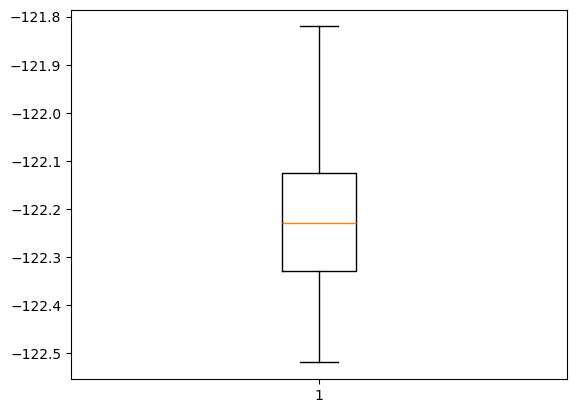

In [63]:
plt.boxplot(df['Longitude'])

In [64]:
Q1 = np.quantile(df['Living Area after Renovation (in Sqft)'],0.25)
Q3 = np.quantile(df['Living Area after Renovation (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 1490.0
Q3 2360.0
IQR 870.0
upper bound 3665.0
lower bound 185.0


In [65]:
living_renovation_outliers = []
for i in df['Living Area after Renovation (in Sqft)']:
  if i > upperbound or i < lowerbound:
    living_renovation_outliers.append(i)
living_renovation_outliers

[4760.0,
 4110.0,
 3740.0,
 3836.0,
 3890.0,
 4180.0,
 3920.0,
 4550.0,
 3860.0,
 3860.0,
 4050.0,
 4680.0,
 3930.0,
 4300.0,
 3850.0,
 4210.0,
 3980.0,
 3920.0,
 3715.0,
 4190.0,
 4230.0,
 3890.0,
 4100.0,
 4090.0,
 3680.0,
 4100.0,
 3720.0,
 4750.0,
 3950.0,
 5790.0,
 3890.0,
 4320.0,
 4640.0,
 3970.0,
 4600.0,
 3950.0,
 5600.0,
 3820.0,
 3950.0,
 3720.0,
 4800.0,
 3990.0,
 3720.0,
 3860.0,
 3900.0,
 3720.0,
 4060.0,
 3910.0,
 3730.0,
 3760.0,
 3910.0,
 3770.0,
 3960.0,
 4620.0,
 4050.0,
 3860.0,
 3730.0,
 4470.0,
 4890.0,
 3690.0,
 3680.0,
 3780.0,
 3980.0,
 3690.0,
 4240.0,
 3890.0,
 4670.0,
 4050.0,
 4350.0,
 5380.0,
 4330.0,
 3830.0,
 5000.0,
 3680.0,
 4250.0,
 4080.0,
 4110.0,
 4190.0,
 3770.0,
 3736.0,
 4600.0,
 3980.0,
 4170.0,
 4090.0,
 3750.0,
 3680.0,
 4630.0,
 3910.0,
 3880.0,
 4110.0,
 3960.0,
 3710.0,
 3930.0,
 4170.0,
 3721.0,
 3930.0,
 4650.0,
 4020.0,
 3920.0,
 3900.0,
 4470.0,
 3680.0,
 3710.0,
 4240.0,
 4020.0,
 3920.0,
 4320.0,
 3770.0,
 4190.0,
 3720.0,
 4230.0,
 

In [66]:
df['Living Area after Renovation (in Sqft)'] = df['Living Area after Renovation (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Living Area after Renovation (in Sqft)']

,Living Area after Renovation (in Sqft)
0,1340.0
1,1690.0
2,2720.0
3,1360.0
4,1800.0
...,...
21608,1530.0
21609,1830.0
21610,1020.0
21611,1410.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31dd8260>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31dd9c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31dd9580>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31dda240>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31dda120>],
 'means': []}

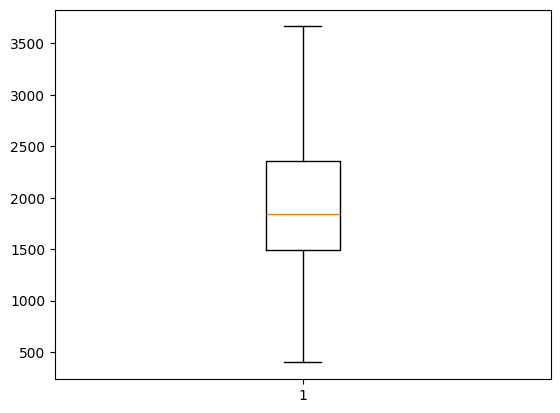

In [67]:
plt.boxplot(df['Living Area after Renovation (in Sqft)'])

In [68]:
Q1 = np.quantile(df['Lot Area after Renovation (in Sqft)'],0.25)
Q3 = np.quantile(df['Lot Area after Renovation (in Sqft)'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 5100.0
Q3 10084.0
IQR 4984.0
upper bound 17560.0
lower bound -2376.0


In [69]:
lot_renovation_outliers = []
for i in df['Lot Area after Renovation (in Sqft)']:
  if i > upperbound or i < lowerbound:
    lot_renovation_outliers.append(i)
lot_renovation_outliers

[101930,
 20336,
 30617,
 72513,
 18900,
 20158,
 38917,
 50529,
 35020,
 39750,
 135036,
 35065,
 47777,
 35001,
 88500,
 19265,
 87991,
 193842,
 18000,
 36590,
 35230,
 67268,
 50965,
 18386,
 20953,
 35096,
 80100,
 148539,
 18841,
 36224,
 33450,
 20060,
 47443,
 49385,
 19508,
 78408,
 57500,
 17958,
 35781,
 78408,
 20000,
 32156,
 19207,
 22654,
 17689,
 28399,
 44049,
 21455,
 24361,
 19868,
 19009,
 27743,
 22357,
 36852,
 143947,
 36497,
 18295,
 174240,
 211267,
 39480,
 21887,
 210394,
 75396,
 181319,
 50529,
 178160,
 233971,
 28837,
 49206,
 104374,
 24728,
 29170,
 20697,
 65340,
 107898,
 25346,
 98010,
 199504,
 165963,
 43560,
 32186,
 19400,
 35982,
 38255,
 26324,
 18000,
 213444,
 34589,
 21567,
 38312,
 41075,
 37034,
 23900,
 54885,
 33341,
 218222,
 34500,
 23680,
 63162,
 25792,
 33171,
 36149,
 36906,
 101529,
 18306,
 18503,
 28826,
 47916,
 27600,
 33900,
 213444,
 32417,
 32130,
 37891,
 19811,
 35160,
 75358,
 33447,
 21803,
 217800,
 44431,
 21810,
 443

In [70]:
df['Lot Area after Renovation (in Sqft)'] = df['Lot Area after Renovation (in Sqft)'].clip(lower = lowerbound,upper = upperbound)
df['Lot Area after Renovation (in Sqft)']

,Lot Area after Renovation (in Sqft)
0,5650
1,7639
2,8062
3,5000
4,7503
...,...
21608,1509
21609,7200
21610,2007
21611,1287


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31c58b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31c59100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31c1baa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31c59700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31c59970>],
 'means': []}

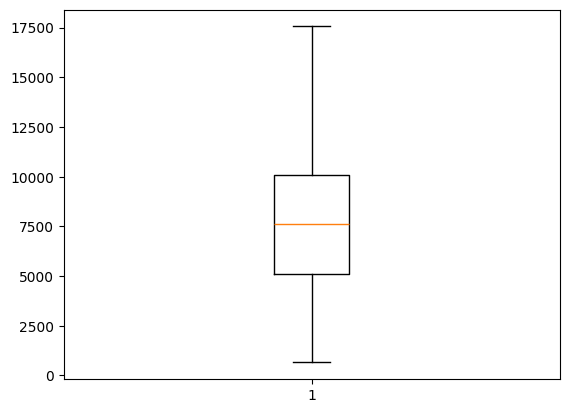

In [71]:
plt.boxplot(df['Lot Area after Renovation (in Sqft)'])

In [72]:
Q1 = np.quantile(df['Latitude'],0.25)
Q3 = np.quantile(df['Latitude'],0.75)
IQR = Q3-Q1
upperbound = Q3 + (1.5*IQR)
lowerbound = Q1 - (1.5*IQR)
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)
print('upper bound',upperbound)
print('lower bound',lowerbound)

Q1 47.471
Q3 47.678
IQR 0.20700000000000074
upper bound 47.9885
lower bound 47.1605


In [73]:
latitude_outliers = []
for i in df['Latitude']:
  if i > upperbound or i < lowerbound:
    latitude_outliers.append(i)
latitude_outliers

[47.1559, 47.1593]

In [74]:
df['Latitude'] = df['Latitude'].clip(lower = lowerbound,upper = upperbound)
df['Latitude']

,Latitude
0,47.5112
1,47.7210
2,47.7379
3,47.5208
4,47.6168
...,...
21608,47.6993
21609,47.5107
21610,47.5944
21611,47.5345


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3b31cbd040>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3b31cbd5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3b31cbcd40>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3b31cbdb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3b31cbde50>],
 'means': []}

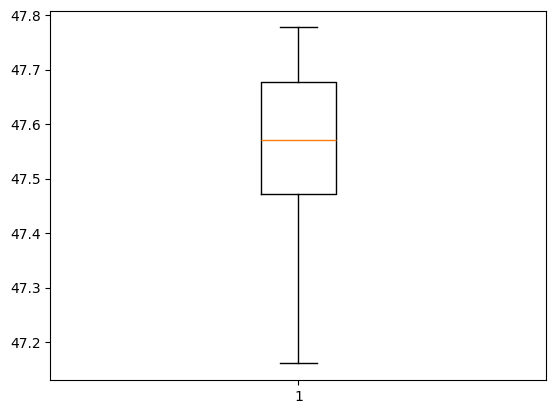

In [75]:
plt.boxplot(df['Latitude'])

In [76]:
df['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [77]:
ordinal_enc = OrdinalEncoder(categories=[['Bad','Okay','Fair','Good','Excellent']])
df['Condition of the House'] = ordinal_enc.fit_transform(df[['Condition of the House']])
df['Condition of the House']

,Condition of the House
0,2.0
1,2.0
2,2.0
3,4.0
4,2.0
...,...
21608,2.0
21609,2.0
21610,2.0
21611,2.0


In [78]:
df = pd.get_dummies(df,
                    columns=['Waterfront View'],
                    prefix='WV',
                    drop_first=True,
                    dtype='int64')

In [79]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,2.0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,0
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,NaN,2.0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,0
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,NaN,2.0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,0
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,NaN,4.0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,0
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,NaN,2.0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,NaN,2.0,...,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,0
21609,6600060120,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,NaN,2.0,...,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,0
21610,1523300141,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,NaN,2.0,...,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,0
21611,291310100,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,2.0,...,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,0


In [80]:
target = 'Sale Price'
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target)
num_cols

Index(['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'WV_Yes'],
      dtype='object')

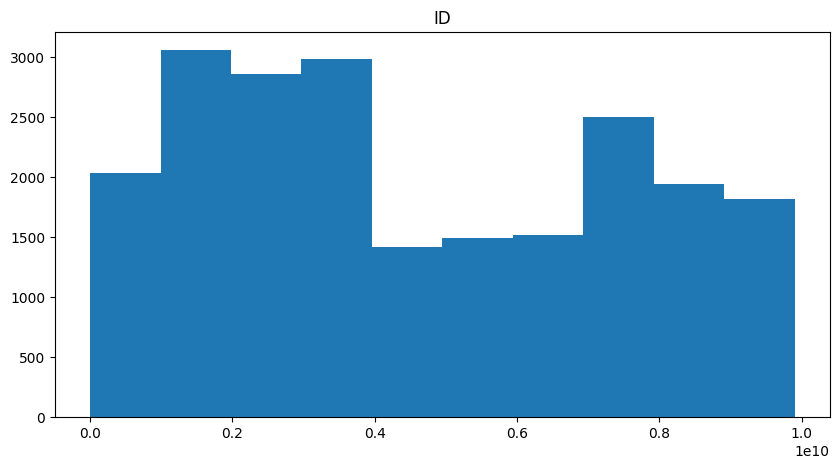

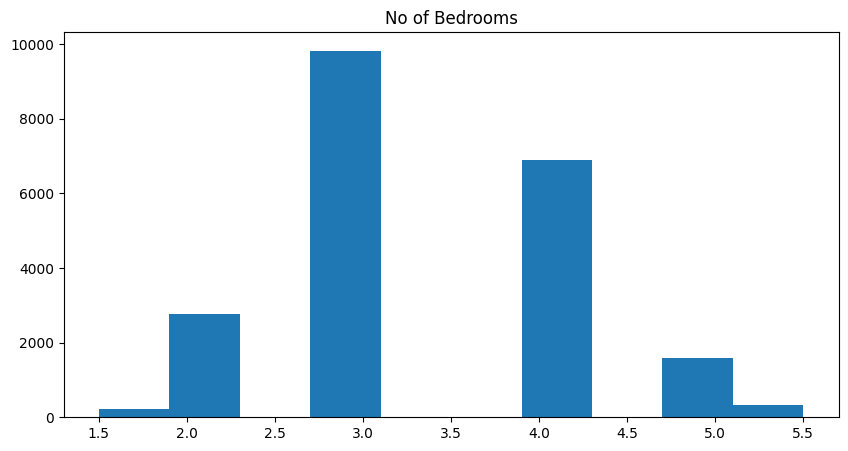

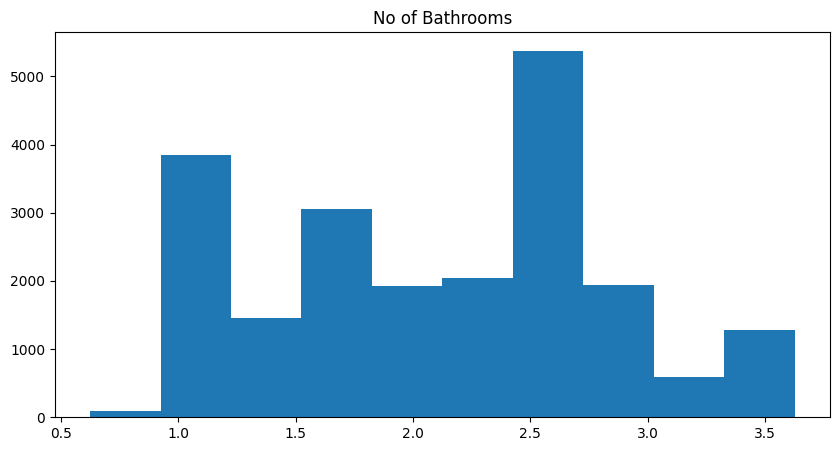

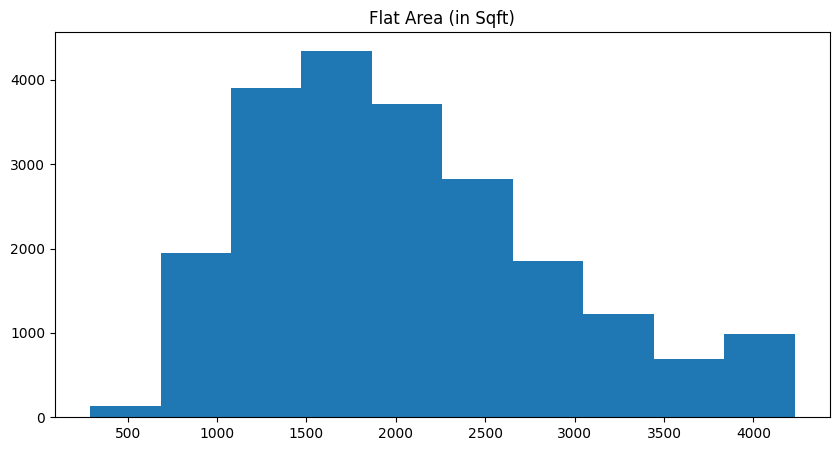

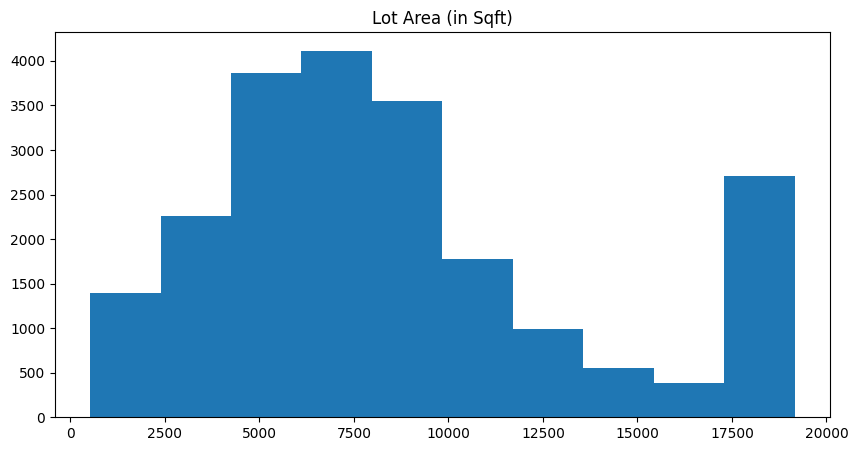

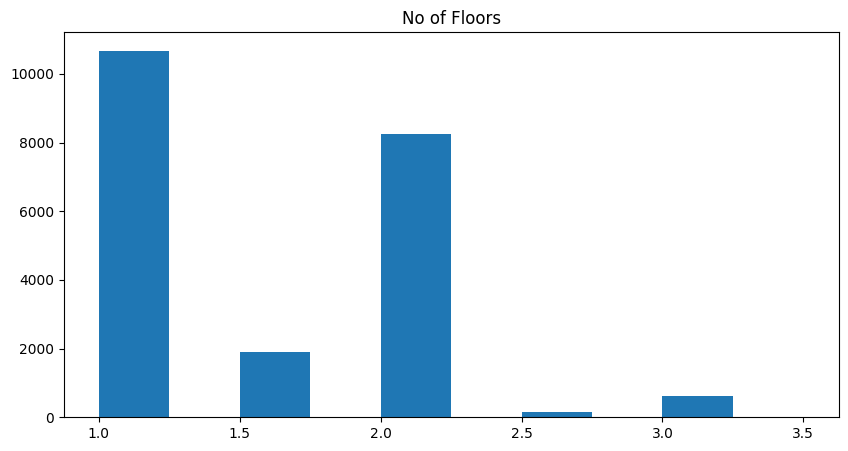

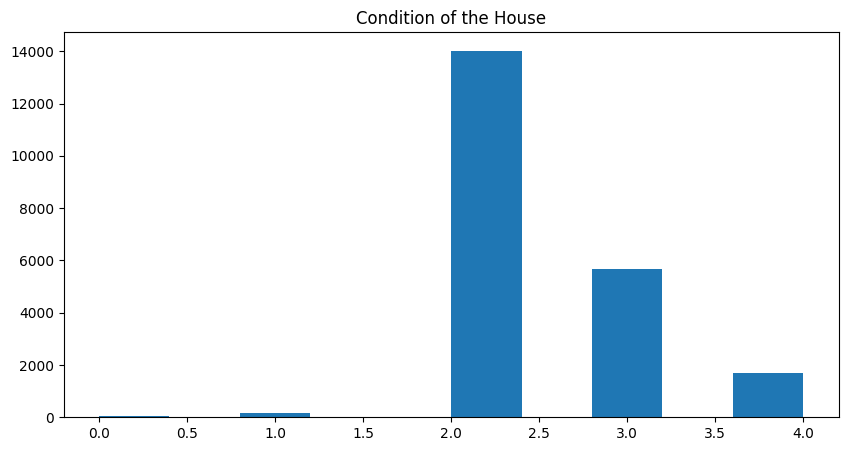

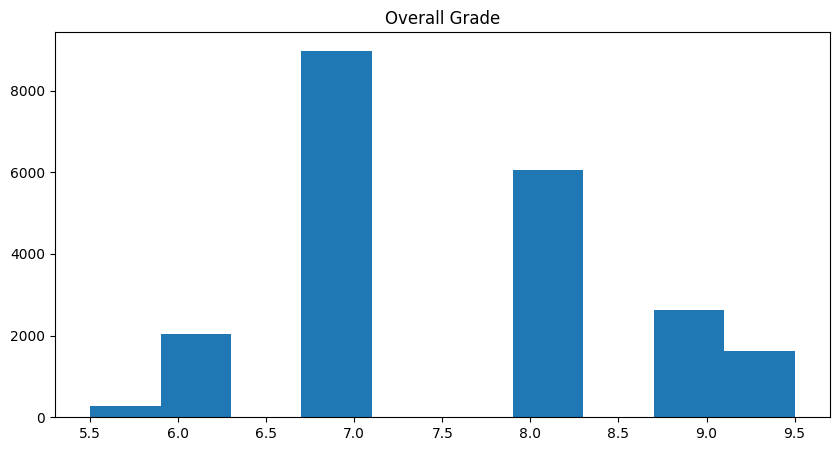

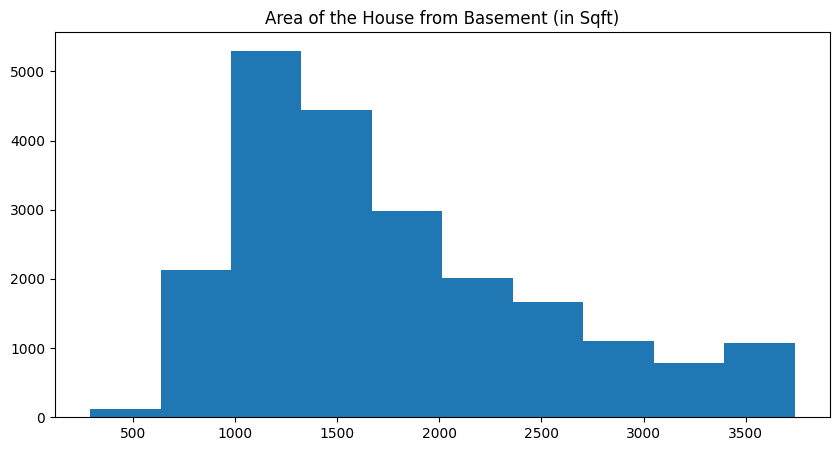

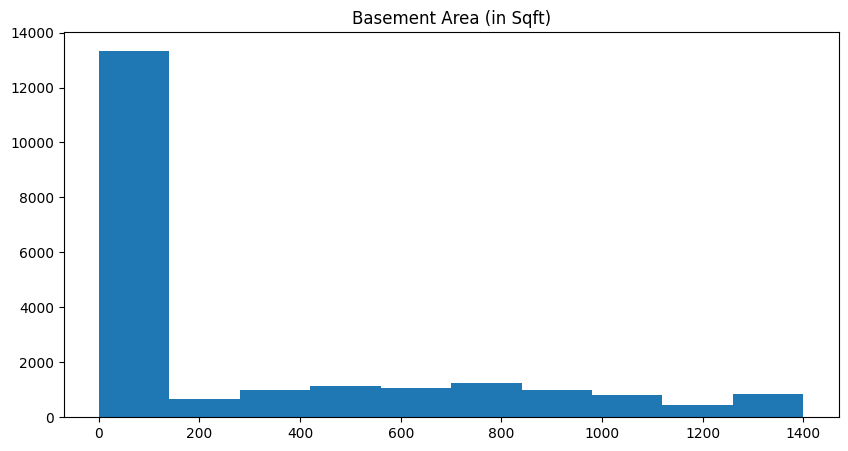

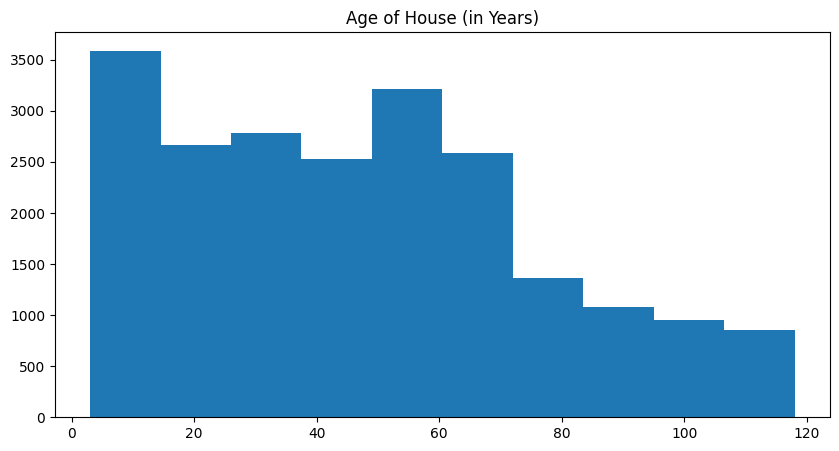

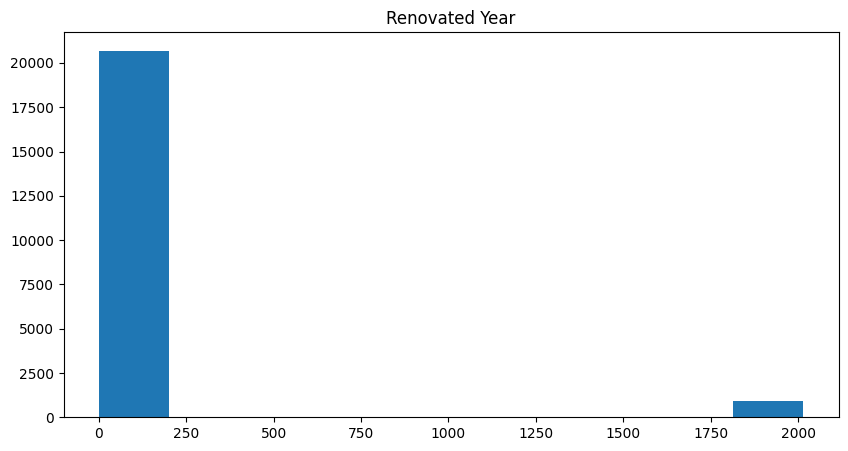

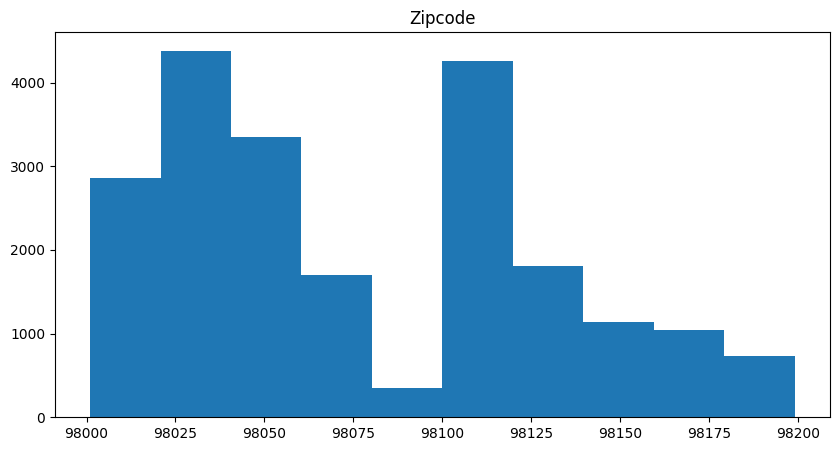

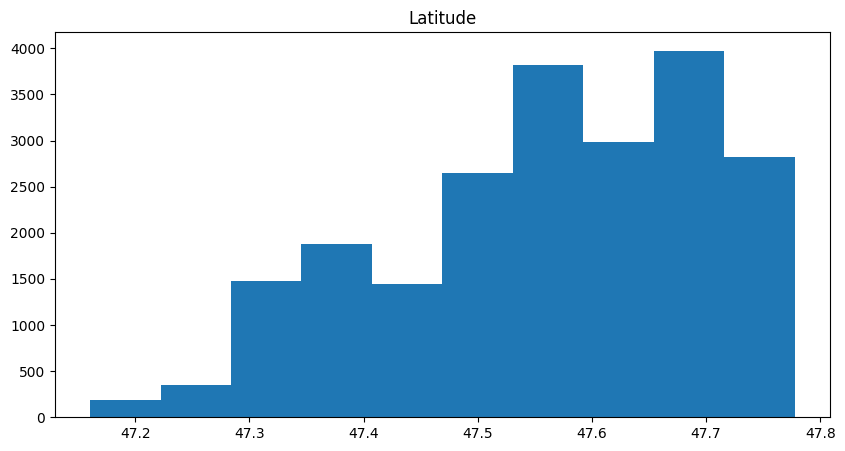

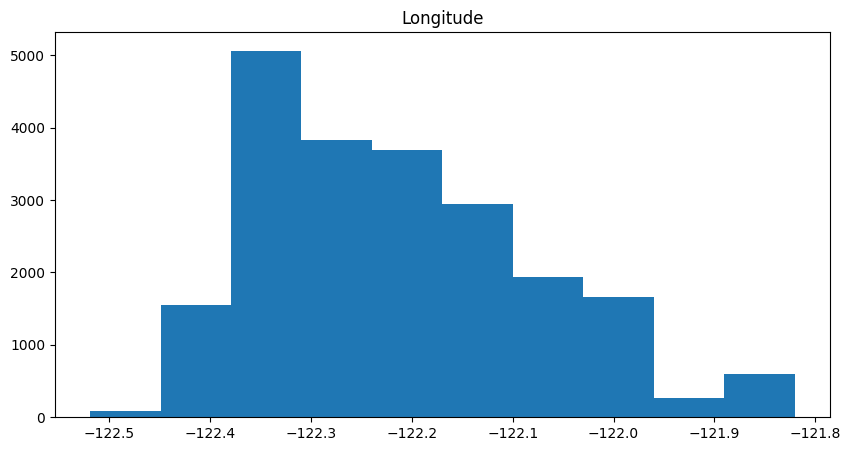

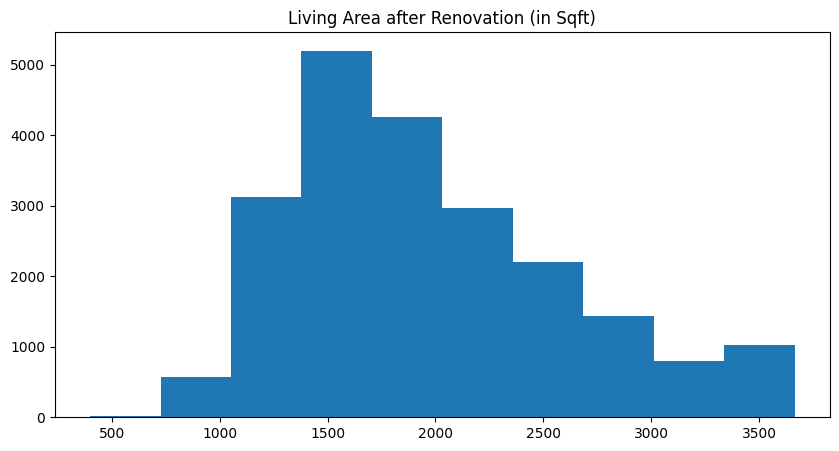

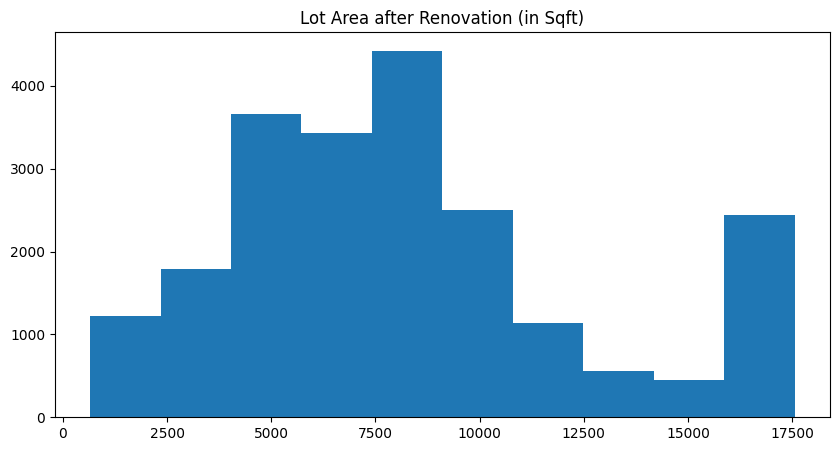

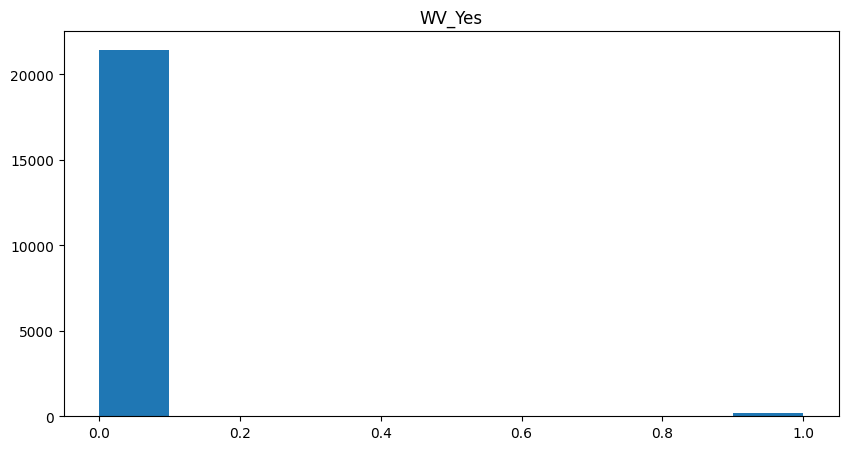

In [81]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.hist(df[i])
  plt.title(i)

In [82]:
min_scaler = MinMaxScaler()
df[['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
    'Lot Area (in Sqft)','No of Floors','Latitude','Longitude',
    'Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']] = min_scaler.fit_transform(df[['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
    'Lot Area (in Sqft)','No of Floors','Latitude','Longitude',
    'Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']])
df[['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
    'Lot Area (in Sqft)','No of Floors','Latitude','Longitude',
    'Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']]

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Latitude,Longitude,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.375,0.125000,0.225888,0.275252,0.0,0.568303,0.375089,0.375,0.257971,0.000000,0.288120,0.295641
1,0.375,0.541667,0.578680,0.360671,0.4,0.908281,0.286328,0.375,0.544928,0.285714,0.395285,0.413271
2,0.125,0.125000,0.121827,0.508652,0.0,0.935667,0.409449,0.125,0.139130,0.000000,0.710655,0.438287
3,0.625,0.791667,0.423858,0.240376,0.0,0.583860,0.180387,0.375,0.220290,0.650000,0.294244,0.257200
4,0.375,0.458333,0.352792,0.405634,0.0,0.739426,0.678597,0.625,0.402899,0.000000,0.428965,0.405228
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.375,0.625000,0.314721,0.032783,0.8,0.873116,0.247674,0.625,0.359420,0.000000,0.346295,0.050742
21609,0.625,0.625000,0.512690,0.283997,0.4,0.567493,0.224767,0.625,0.585507,0.000000,0.438151,0.387309
21610,0.125,0.041667,0.185279,0.044534,0.4,0.703128,0.314961,0.375,0.211594,0.000000,0.190141,0.080194
21611,0.375,0.625000,0.332487,0.100228,0.4,0.606061,0.644238,0.625,0.379710,0.000000,0.309553,0.037613


array([[<Axes: title={'center': 'No of Bedrooms'}>,
        <Axes: title={'center': 'No of Bathrooms'}>,
        <Axes: title={'center': 'Flat Area (in Sqft)'}>],
       [<Axes: title={'center': 'Lot Area (in Sqft)'}>,
        <Axes: title={'center': 'No of Floors'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Overall Grade'}>,
        <Axes: title={'center': 'Area of the House from Basement (in Sqft)'}>],
       [<Axes: title={'center': 'Basement Area (in Sqft)'}>,
        <Axes: title={'center': 'Living Area after Renovation (in Sqft)'}>,
        <Axes: title={'center': 'Lot Area after Renovation (in Sqft)'}>]],
      dtype=object)

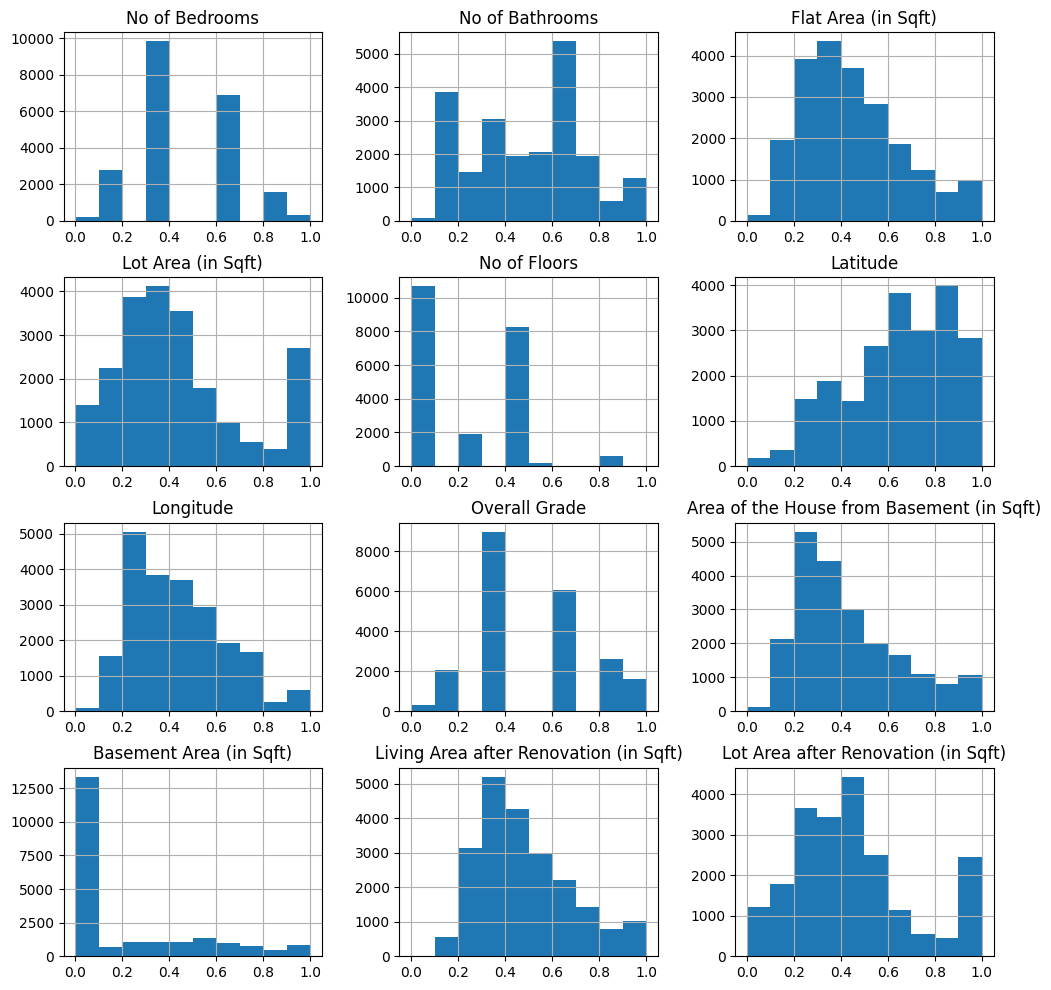

In [83]:
df[['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
    'Lot Area (in Sqft)','No of Floors','Latitude','Longitude',
    'Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']].hist(figsize=(12,12))

In [84]:
x = df.drop(columns=[target])
y = df[target]

In [85]:
x

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
0,7129300520,14 October 2017,0.375,0.125000,0.225888,0.275252,0.0,NaN,2.0,0.375,0.257971,0.000000,63,0,98178.0,0.568303,0.375089,0.288120,0.295641,0
1,6414100192,14 December 2017,0.375,0.541667,0.578680,0.360671,0.4,NaN,2.0,0.375,0.544928,0.285714,67,1991,98125.0,0.908281,0.286328,0.395285,0.413271,0
2,5631500400,15 February 2016,0.125,0.125000,0.121827,0.508652,0.0,NaN,2.0,0.125,0.139130,0.000000,85,0,98028.0,0.935667,0.409449,0.710655,0.438287,0
3,2487200875,14 December 2017,0.625,0.791667,0.423858,0.240376,0.0,NaN,4.0,0.375,0.220290,0.650000,53,0,98136.0,0.583860,0.180387,0.294244,0.257200,0
4,1954400510,15 February 2016,0.375,0.458333,0.352792,0.405634,0.0,NaN,2.0,0.625,0.402899,0.000000,31,0,98074.0,0.739426,0.678597,0.428965,0.405228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,0.375,0.625000,0.314721,0.032783,0.8,NaN,2.0,0.625,0.359420,0.000000,9,0,98103.0,0.873116,0.247674,0.346295,0.050742,0
21609,6600060120,15 February 2016,0.625,0.625000,0.512690,0.283997,0.4,NaN,2.0,0.625,0.585507,0.000000,4,0,98146.0,0.567493,0.224767,0.438151,0.387309,0
21610,1523300141,14 June 2017,0.125,0.041667,0.185279,0.044534,0.4,NaN,2.0,0.375,0.211594,0.000000,9,0,98144.0,0.703128,0.314961,0.190141,0.080194,0
21611,291310100,15 January 2016,0.375,0.625000,0.332487,0.100228,0.4,NaN,2.0,0.625,0.379710,0.000000,14,0,98027.0,0.606061,0.644238,0.309553,0.037613,0


In [86]:
y

,Sale Price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
x_train

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
7095,8563030280,14 May 2017,0.375,0.625000,0.441624,0.422696,0.4,NaN,3.0,0.875,0.504348,0.000000,43,0,98008.0,0.756279,0.607015,0.627985,0.440771,0
18538,7905200205,14 October 2017,0.375,0.125000,0.238579,0.348759,0.0,NaN,2.0,0.375,0.231884,0.100000,94,0,98116.0,0.666667,0.184681,0.303429,0.307469,0
20023,301402120,14 June 2017,0.375,0.541667,0.302284,0.123407,0.4,NaN,2.0,0.375,0.345217,0.000000,6,0,98002.0,0.300113,0.432355,0.331292,0.140576,0
6254,1522059120,14 July 2017,0.875,0.875000,0.769036,0.580550,0.4,NaN,3.0,0.625,0.634783,0.600000,19,0,98042.0,0.372549,0.522548,0.591243,0.454669,0
15383,163000010,14 July 2017,0.625,0.625000,0.460660,0.299021,0.4,NaN,2.0,0.625,0.526087,0.000000,15,0,98042.0,0.312105,0.532570,0.468769,0.435922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,3589500260,14 November 2017,0.625,0.458333,0.459391,0.213548,0.0,NaN,4.0,0.375,0.223188,0.742857,94,0,98105.0,0.825474,0.289191,0.465707,0.192146,0
21579,7011201004,14 May 2017,0.375,0.875000,0.365482,0.038042,0.4,Twice,2.0,0.875,0.298551,0.292857,10,0,98119.0,0.772808,0.214746,0.401408,0.061210,0
5392,6075000050,14 July 2017,0.625,0.375000,0.258883,0.492019,0.0,NaN,3.0,0.375,0.295652,0.000000,51,0,98011.0,0.964836,0.419470,0.575934,0.530309,0
862,6403310060,14 August 2017,0.375,0.375000,0.345178,0.516700,0.0,NaN,2.0,0.625,0.272464,0.300000,42,0,98033.0,0.868255,0.501074,0.468769,0.491277,0


In [89]:
x_test

,ID,Date House was Sold,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
4984,1443550020,15 May 2016,0.625,0.625000,0.596447,0.606090,0.4,NaN,2.0,0.625,0.681159,0.000000,19,0,98019.0,0.927726,0.788833,0.612676,0.660299,0
10256,510003230,14 August 2017,0.375,0.625000,0.289340,0.090141,0.2,NaN,3.0,0.375,0.330435,0.000000,108,0,98103.0,0.809593,0.269148,0.410594,0.214324,0
4046,2420069201,14 November 2017,0.375,0.458333,0.279188,0.294299,0.4,NaN,2.0,0.625,0.318841,0.000000,13,0,98022.0,0.082969,0.757337,0.264850,0.289727,0
21269,1601600167,14 May 2017,0.875,0.708333,0.538071,0.240537,0.0,NaN,2.0,0.375,0.324638,0.714286,10,0,98118.0,0.598444,0.350752,0.364666,0.257378,0
10496,3085001610,14 September 2017,0.625,0.375000,0.439086,0.294031,0.0,NaN,2.0,0.375,0.385507,0.285714,59,0,98144.0,0.674931,0.310666,0.450398,0.198060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,2600000210,14 June 2017,0.625,0.625000,0.769036,0.610651,0.4,NaN,4.0,0.875,0.684058,0.478571,41,0,98006.0,0.637660,0.513958,0.704532,0.618783,0
11301,421049114,14 October 2017,0.375,0.125000,0.157360,0.568585,0.0,NaN,2.0,0.375,0.179710,0.000000,63,0,98003.0,0.296062,0.300644,0.334048,0.459223,0
20765,5428000070,15 May 2016,0.875,0.958333,1.000000,0.413897,0.4,Twice,2.0,1.000,0.886957,1.000000,5,0,98198.0,0.319073,0.287759,0.539192,0.818795,0
2524,835000055,14 June 2017,0.125,0.125000,0.185279,0.247351,0.0,NaN,3.0,0.125,0.211594,0.000000,70,0,98002.0,0.227678,0.419470,0.245254,0.345733,0


In [90]:
y_test

,Sale Price
4984,570000.0
10256,720001.0
4046,267000.0
21269,365000.0
10496,397000.0
...,...
8943,852600.0
11301,128000.0
20765,770000.0
2524,175000.0


In [91]:
y_train

,Sale Price
7095,700000.0
18538,410000.0
20023,240000.0
6254,409124.0
15383,330000.0
...,...
11966,550000.0
21579,645000.0
5392,323000.0
862,539900.0


In [92]:
x_train.shape

(17287, 20)

In [93]:
x_test.shape

(4322, 20)

In [94]:
df.to_csv("House_Pricing_Cleaned.csv", index=False)
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
0,7129300520,14 October 2017,221900.0,0.375,0.125000,0.225888,0.275252,0.0,NaN,2.0,...,0.257971,0.000000,63,0,98178.0,0.568303,0.375089,0.288120,0.295641,0
1,6414100192,14 December 2017,538000.0,0.375,0.541667,0.578680,0.360671,0.4,NaN,2.0,...,0.544928,0.285714,67,1991,98125.0,0.908281,0.286328,0.395285,0.413271,0
2,5631500400,15 February 2016,180000.0,0.125,0.125000,0.121827,0.508652,0.0,NaN,2.0,...,0.139130,0.000000,85,0,98028.0,0.935667,0.409449,0.710655,0.438287,0
3,2487200875,14 December 2017,604000.0,0.625,0.791667,0.423858,0.240376,0.0,NaN,4.0,...,0.220290,0.650000,53,0,98136.0,0.583860,0.180387,0.294244,0.257200,0
4,1954400510,15 February 2016,510000.0,0.375,0.458333,0.352792,0.405634,0.0,NaN,2.0,...,0.402899,0.000000,31,0,98074.0,0.739426,0.678597,0.428965,0.405228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,0.375,0.625000,0.314721,0.032783,0.8,NaN,2.0,...,0.359420,0.000000,9,0,98103.0,0.873116,0.247674,0.346295,0.050742,0
21609,6600060120,15 February 2016,400000.0,0.625,0.625000,0.512690,0.283997,0.4,NaN,2.0,...,0.585507,0.000000,4,0,98146.0,0.567493,0.224767,0.438151,0.387309,0
21610,1523300141,14 June 2017,402101.0,0.125,0.041667,0.185279,0.044534,0.4,NaN,2.0,...,0.211594,0.000000,9,0,98144.0,0.703128,0.314961,0.190141,0.080194,0
21611,291310100,15 January 2016,400000.0,0.375,0.625000,0.332487,0.100228,0.4,NaN,2.0,...,0.379710,0.000000,14,0,98027.0,0.606061,0.644238,0.309553,0.037613,0


In [95]:
df.drop(columns='ID')

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),WV_Yes
0,14 October 2017,221900.0,0.375,0.125000,0.225888,0.275252,0.0,NaN,2.0,0.375,0.257971,0.000000,63,0,98178.0,0.568303,0.375089,0.288120,0.295641,0
1,14 December 2017,538000.0,0.375,0.541667,0.578680,0.360671,0.4,NaN,2.0,0.375,0.544928,0.285714,67,1991,98125.0,0.908281,0.286328,0.395285,0.413271,0
2,15 February 2016,180000.0,0.125,0.125000,0.121827,0.508652,0.0,NaN,2.0,0.125,0.139130,0.000000,85,0,98028.0,0.935667,0.409449,0.710655,0.438287,0
3,14 December 2017,604000.0,0.625,0.791667,0.423858,0.240376,0.0,NaN,4.0,0.375,0.220290,0.650000,53,0,98136.0,0.583860,0.180387,0.294244,0.257200,0
4,15 February 2016,510000.0,0.375,0.458333,0.352792,0.405634,0.0,NaN,2.0,0.625,0.402899,0.000000,31,0,98074.0,0.739426,0.678597,0.428965,0.405228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,14 May 2017,360000.0,0.375,0.625000,0.314721,0.032783,0.8,NaN,2.0,0.625,0.359420,0.000000,9,0,98103.0,0.873116,0.247674,0.346295,0.050742,0
21609,15 February 2016,400000.0,0.625,0.625000,0.512690,0.283997,0.4,NaN,2.0,0.625,0.585507,0.000000,4,0,98146.0,0.567493,0.224767,0.438151,0.387309,0
21610,14 June 2017,402101.0,0.125,0.041667,0.185279,0.044534,0.4,NaN,2.0,0.375,0.211594,0.000000,9,0,98144.0,0.703128,0.314961,0.190141,0.080194,0
21611,15 January 2016,400000.0,0.375,0.625000,0.332487,0.100228,0.4,NaN,2.0,0.625,0.379710,0.000000,14,0,98027.0,0.606061,0.644238,0.309553,0.037613,0


In [96]:
from google.colab import files
files.download("House_Pricing_Cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>